In [1]:
import pandas

publications = pandas.read_xml("invoices.xml")
print(publications.head())

publications.to_xml("invoices_export.xml", index=False, root_name="invoices", row_name="invoice")


AttributeError: module 'pandas' has no attribute 'read_xml'

In [2]:
import requests

r = requests.get("https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets/dopravni-urazy.csv")
open("dopravni-urazy.csv", "wb").write(r.content)

r = requests.get("https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets/kraje.csv")
open("kraje.csv", "wb").write(r.content)

r = requests.get("https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets/sportoviste.json")
open("sportoviste.json", "wb").write(r.content)

r = requests.get("https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets/adopce-zvirat.csv")
open("adopce-zvirat.csv", "wb").write(r.content)

30591

In [5]:
import pandas as pd

urazy = pd.read_csv("dopravni-urazy.csv")
kraje = pd.read_csv("kraje.csv")

urazy.head()
kraje.head()


,kod_polozky,nazev_polozky
0,CZ000,"ČR (kromě bezdomovců, cizinců, neevidovaných)"
1,CZ001,"ČR (včetně bezdomovců, cizinců, neevidovaných)"
2,CZ010,Hlavní město Praha
3,CZ020,Středočeský kraj
4,CZ031,Jihočeský kraj


In [6]:
#vytvoření prázdné tabulky
urazy_prumer = pd.DataFrame(columns=["nazev_kraje", "hodnota"])
urazy_prumer


,nazev_kraje,hodnota


In [10]:
#procházíme tabulku krajů, vytahujeme unikátní hodnoy a na ni vážeme průměry
for idx, kraj in kraje.iterrows():
  kod_kraje = kraj["kod_polozky"]
  nazev_kraje = kraj["nazev_polozky"]
  prumerna_hodnota = urazy[urazy["kraj"] == kod_kraje]["hodnota"].mean()
  urazy_prumer = urazy_prumer.append({"nazev_kraje": nazev_kraje, "hodnota": prumerna_hodnota}, ignore_index=True)

'''obměna s itertuples - tečková notace, je rychlejší
for idx, kraj in kraje.itertuples():
  kod_kraje = kraj.kod_polozky
  nazev_kraje = kraj.nazev_polozky
  prumerna_hodnota = urazy[urazy["kraj"] == kod_kraje]["hodnota"].mean()
  urazy_prumer = urazy_prumer.append({"nazev_kraje": nazev_kraje, "hodnota": prumerna_hodnota}, ignore_index=True)

urazy_prumer'''

urazy_prumer

,nazev_kraje,hodnota
0,"ČR (kromě bezdomovců, cizinců, neevidovaných)",1141.560646
1,"ČR (včetně bezdomovců, cizinců, neevidovaných)",NaN
2,Hlavní město Praha,1268.034245
3,Středočeský kraj,863.401743
4,Jihočeský kraj,896.861060
5,Plzeňský kraj,1483.761217
6,Karlovarský kraj,1526.009630
7,Ústecký kraj,658.566122
8,Liberecký kraj,1714.813778
9,Královéhradecký kraj,1985.834042


<AxesSubplot:xlabel='nazev_kraje'>

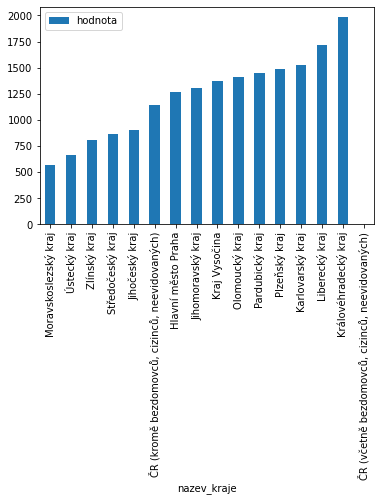

In [11]:
urazy_prumer.sort_values(by="hodnota").plot.bar(x="nazev_kraje", y="hodnota")

In [13]:
#zobrazení množiny
set(urazy["rok"])

{1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017}

<AxesSubplot:xlabel='nazev_polozky'>

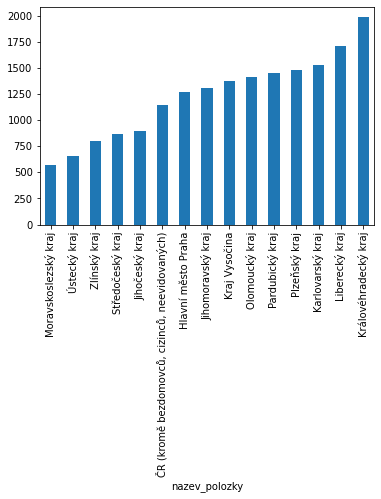

In [16]:
#vezre s merge a groupby
urazy_s_kraji = urazy.merge(kraje, left_on="kraj", right_on="kod_polozky")

urazy_s_kraji.groupby("nazev_polozky")["hodnota"].mean().sort_values().plot.bar(x="nazev_polozky", y="hodnota")

In [28]:
import math
sportoviste = pd.read_json("sportoviste.json")
sportoviste

,OBJECTID,dostupnost,prostor,vlastnik,spravce,foto1,foto2,provozovatel_ic,provozovatel_nazev,sportoviste,...,adresa_kod_adm2,NEAR_FID,NEAR_DIST,NEAR_X,NEAR_Y,NEAR_ANGLE,cena,foto3,POINT_X,POINT_Y
0,1,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,64618188,Technické služby Opava s.r.o.,sportoviště,...,4521668.0,7167.0,63.858786,-497883.88,-1086130.13,-171.946563,NaN,NaN,17.886344,49.952289
1,2,po domluvě / v rámci otevírací doby,venkovní,statutární město Opava,Seniorcentrum Opava,None,None,71196943,Seniorcentrum Opava,sportoviště,...,4491483.0,2483.0,22.821850,-496032.44,-1087009.24,-66.872318,NaN,NaN,17.912125,49.945973
2,3,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,64618188,Technické služby Opava s.r.o.,sportoviště,...,24376931.0,7104.0,47.868888,-497620.28,-1087329.31,147.833651,NaN,NaN,17.891244,49.941440
3,4,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,64618188,Technické služby Opava s.r.o.,dětské hřiště,...,4523521.0,6559.0,35.343983,-497592.61,-1087410.36,-156.606515,NaN,NaN,17.891568,49.941084
4,5,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,64618188,Technické služby Opava s.r.o.,dětské hřiště,...,4488407.0,3765.0,33.956871,-496361.26,-1087028.91,174.000780,NaN,NaN,17.908212,49.945345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,252,po domluvě / v rámci otevírací doby,venkovní,statutární město Opava,Technické služby Opava,642.jpg,642a.jpg,-,Slezský FC Opava,sportoviště,...,24373974.0,8359.0,51.155003,-497621.14,-1086393.86,138.516344,NaN,NaN,17.883424,49.951234
250,254,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,00300535,statutární město Opava,sportoviště,...,4522591.0,6511.0,125.828021,-498088.48,-1087088.22,124.210054,NaN,NaN,17.885657,49.942891
251,256,po domluvě / v rámci otevírací doby,venkovní,statutární město Opava,městská část Podvihov,None,None,-,Městská část Podvihov,dětské hřiště,...,40584992.0,1514.0,64.508796,-492866.30,-1095699.22,65.510699,NaN,NaN,17.967360,49.869993
252,257,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,64618188,Technické služby Opava s.r.o.,sportoviště,...,4521668.0,7167.0,63.858786,-497883.88,-1086130.13,-171.946563,NaN,NaN,17.887015,49.951403


In [29]:
sportoviste.dropna(how="all", axis="columns", inplace=True)
sportoviste.set_index("OBJECTID", inplace=True)
sportoviste = sportoviste.rename(columns={"POINT_Y": "zem_sirka", "POINT_X": "zem_delka"})
sportoviste

,dostupnost,prostor,vlastnik,spravce,foto1,foto2,provozovatel_ic,provozovatel_nazev,sportoviste,sportoviste_nazev,...,sport,vstupne,adresa_kod_adm2,NEAR_FID,NEAR_DIST,NEAR_X,NEAR_Y,NEAR_ANGLE,zem_delka,zem_sirka
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,64618188,Technické služby Opava s.r.o.,sportoviště,sportoviště,...,workout,bezplatné,4521668.0,7167.0,63.858786,-497883.88,-1086130.13,-171.946563,17.886344,49.952289
2,po domluvě / v rámci otevírací doby,venkovní,statutární město Opava,Seniorcentrum Opava,None,None,71196943,Seniorcentrum Opava,sportoviště,Seniorcentrum Opava,...,hřiště pro seniory,bezplatné,4491483.0,2483.0,22.821850,-496032.44,-1087009.24,-66.872318,17.912125,49.945973
3,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,64618188,Technické služby Opava s.r.o.,sportoviště,sportoviště,...,basketbal,bezplatné,24376931.0,7104.0,47.868888,-497620.28,-1087329.31,147.833651,17.891244,49.941440
4,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,64618188,Technické služby Opava s.r.o.,dětské hřiště,dětské hřiště,...,"herní prvky, pískoviště",bezplatné,4523521.0,6559.0,35.343983,-497592.61,-1087410.36,-156.606515,17.891568,49.941084
5,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,64618188,Technické služby Opava s.r.o.,dětské hřiště,dětské hřiště,...,herní prvky,bezplatné,4488407.0,3765.0,33.956871,-496361.26,-1087028.91,174.000780,17.908212,49.945345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,po domluvě / v rámci otevírací doby,venkovní,statutární město Opava,Technické služby Opava,642.jpg,642a.jpg,-,Slezský FC Opava,sportoviště,Slezský FC Opava,...,fotbal,zpoplatněno,24373974.0,8359.0,51.155003,-497621.14,-1086393.86,138.516344,17.883424,49.951234
254,volně přístupné,venkovní,statutární město Opava,Technické služby Opava,None,None,00300535,statutární město Opava,sportoviště,sportoviště Hliník,...,"softbal, malý fotbal",bezplatné,4522591.0,6511.0,125.828021,-498088.48,-1087088.22,124.210054,17.885657,49.942891
256,po domluvě / v rámci otevírací doby,venkovní,statutární město Opava,městská část Podvihov,None,None,-,Městská část Podvihov,dětské hřiště,Sportovní a rekreační areál Podvihov,...,herní prvky,bezplatné,40584992.0,1514.0,64.508796,-492866.30,-1095699.22,65.510699,17.967360,49.869993


In [30]:
poloha_nadrazi_opava = [49.9345092, 17.9085369]

def vzdalenost_od_bodu(radek, bod):
    # Vypocet vzdalenosti mezi dvema body (Eukleidovska vzdalenost)
    vzdalenost = math.sqrt((bod[0] - radek.zem_sirka) ** 2 + (bod[1] - radek.zem_delka) ** 2)
    # Prevod na vzdalenost v kilometrech a zaokrouhleni
    vzdalenost_km = vzdalenost * (2.0 * 6371 * math.pi / 360.0)
    vzdalenost_km = round(vzdalenost_km, 2)
    return vzdalenost_km
  

In [31]:
sportoviste["vzdalenost_od_nadrazi"] = sportoviste.apply(vzdalenost_od_bodu, axis=1, args=(poloha_nadrazi_opava,))
sportoviste.sort_values(by="vzdalenost_od_nadrazi")[["prostor", "sportoviste_nazev", "vzdalenost_od_nadrazi"]].head()

,prostor,sportoviste_nazev,vzdalenost_od_nadrazi
OBJECTID,,,
231,vnitřní,Střední škola průmyslová a umělecká,0.36
230,vnitřní,Mendelovo gymnázium,0.40
229,venkovní,Mendelovo gymnázium,0.41
228,venkovní,Střední škola hotelnictví a služeb a Vyšší odb...,0.43
227,vnitřní,Sportovní hala Slezského gymnázia,0.43
